In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import os
import sys
import json
import wandb
import torch.nn as nn
from torch.utils.data import DataLoader

notebook_dir = os.getcwd()
parent_dir = os.path.abspath(os.path.join(notebook_dir, '..'))
if parent_dir not in sys.path:
    sys.path.insert(0, parent_dir)
print(sys.path)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

%load_ext autoreload
%autoreload 2

['/mnt/ceph/users/blyo1/projects', '/mnt/sw/nix/store/71ksmx7k6xy3v9ksfkv5mp5kxxp64pd6-python-3.10.13-view/lib/python310.zip', '/mnt/sw/nix/store/71ksmx7k6xy3v9ksfkv5mp5kxxp64pd6-python-3.10.13-view/lib/python3.10', '/mnt/sw/nix/store/71ksmx7k6xy3v9ksfkv5mp5kxxp64pd6-python-3.10.13-view/lib/python3.10/lib-dynload', '', '/mnt/home/blyo1/venvs/py310/lib/python3.10/site-packages']


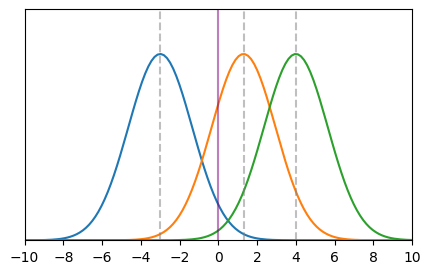

In [2]:
fig, ax = plt.subplots(1, 1, figsize=(5, 3))
# draw several gaussians
x = np.linspace(-16, 16, 200)
mus = [-3, 1.3, 4]
logvars = [1, 1, 1]
for mu, logvar in zip(mus, logvars):
    y = np.exp(-0.5 * (x - mu)**2 / np.exp(logvar)) / (np.sqrt(2 * np.pi * np.exp(logvar)))
    ax.plot(x, y)

# hide the y axis
ax.get_yaxis().set_visible(False)
ax.set_xlim(-10, 10)
ax.set_xticks(np.arange(-10, 11, 2));
ax.set_ylim(0, .3)

# draw vertical lines at the means
for mu in mus:
    ax.axvline(mu, color='gray', linestyle='--', alpha=0.5)

ax.axvline(0, color='purple', linestyle='-', alpha=0.5)

# save figure
fig.savefig('d_analysis/figures/lh_decoder.png', bbox_inches='tight', dpi=300)

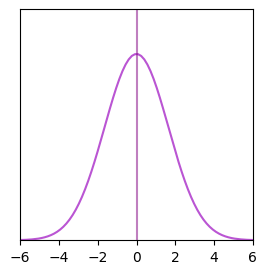

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(3, 3))
# draw several gaussians
x = np.linspace(-16, 16, 200)
mus = [0]
logvars = [1]
for mu, logvar in zip(mus, logvars):
    y = np.exp(-0.5 * (x - mu)**2 / np.exp(logvar)) / (np.sqrt(2 * np.pi * np.exp(logvar)))
    ax.plot(x, y, color='mediumorchid')

# hide the y axis
ax.get_yaxis().set_visible(False)
ax.set_xlim(-6, 6)
ax.set_xticks(np.arange(-6, 7, 2));
ax.set_ylim(0, .3)

# draw vertical lines at the means
# for mu in mus:
#     ax.axvline(mu, color='gray', linestyle='--', alpha=0.5)

ax.axvline(0, color='purple', linestyle='-', alpha=0.5)

# save figure
fig.savefig('d_analysis/figures/lh_decoder_effective.png', bbox_inches='tight', dpi=300)